# Load data

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
df = pd.read_csv('ECE 143.csv')
df.set_index(["State"], inplace=True)
# drop outlier
df = df.drop("California") 
df = df.drop("District of Columbia") # advanced degree outlier

In [29]:
sale_4years = df.iloc[:,0:4]
sale_4years['State'] = sale_4years.index.get_level_values('State')
x=pd.melt(sale_4years,id_vars="State", var_name="years", value_name="sale")
y=x.groupby(["State","years"]).sum()
y['State'] = y.index.get_level_values('State')
y['years'] = y.index.get_level_values('years')
y.head()

sale    State           years
State   years                                        
Alabama EV Sales\n2015   197  Alabama  EV Sales\n2015
        EV Sales\n2016   330  Alabama  EV Sales\n2016
        EV Sales\n2017   381  Alabama  EV Sales\n2017
        EV Sales\n2018   866  Alabama  EV Sales\n2018
Alaska  EV Sales\n2015    61   Alaska  EV Sales\n2015

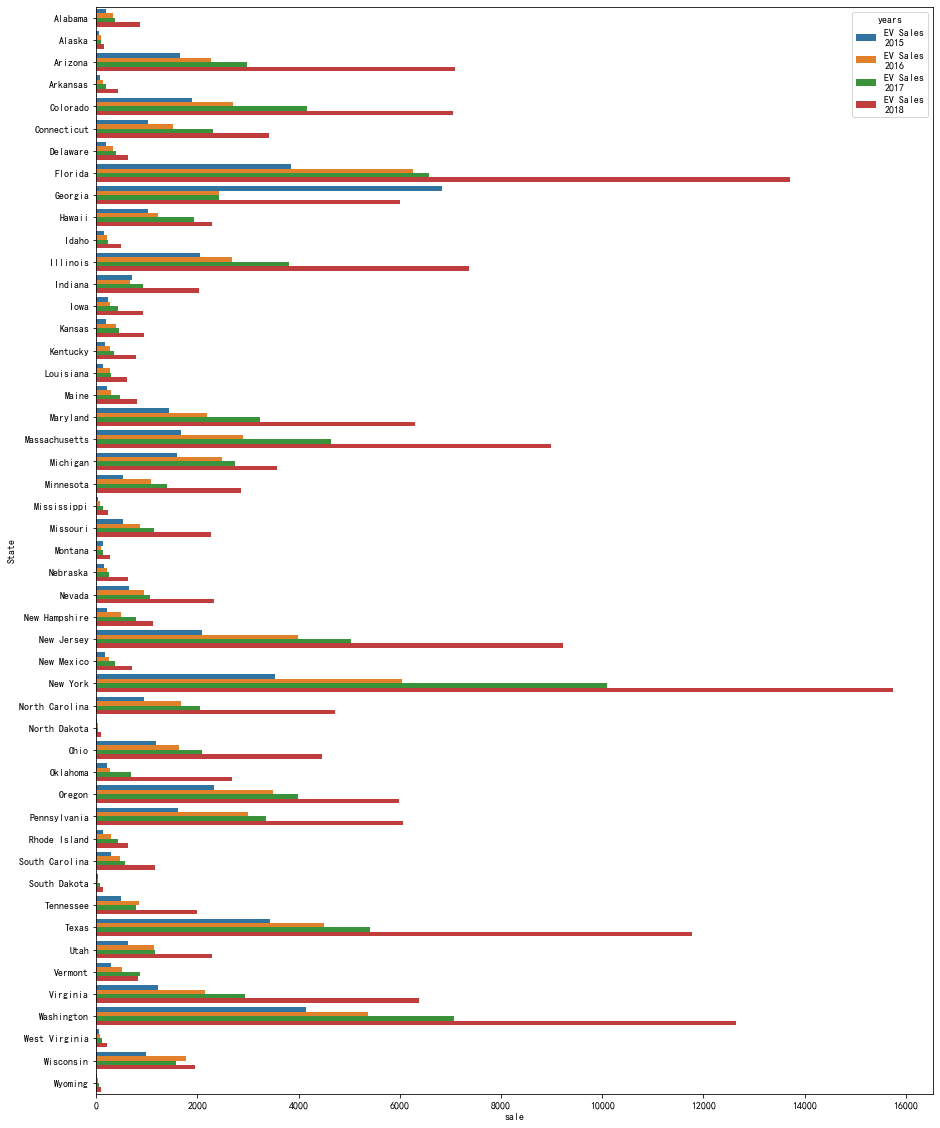

In [30]:
plt.figure(figsize=(15,20))
sns.barplot(x='sale', y='State', hue="years",data=y)

# Linear regression

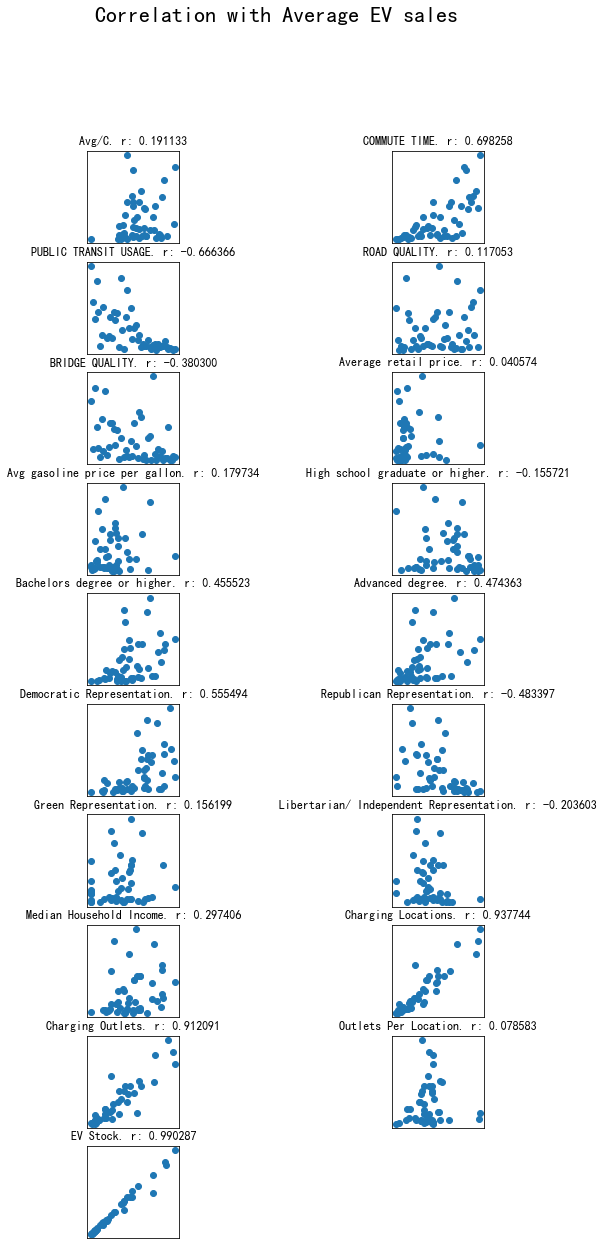

In [31]:
sale_4years = df.iloc[:,0:4]
avg_sales = sale_4years.mean(axis=1).to_frame()
avg_sales.columns = ["Avg_sales"]
avg_sales["Avg_sales"]=avg_sales["Avg_sales"].apply(lambda x : (x-avg_sales["Avg_sales"].mean())/avg_sales["Avg_sales"].std())
cont_cols = df.loc[:,['Avg/C', 'COMMUTE TIME','PUBLIC TRANSIT USAGE','ROAD QUALITY','BRIDGE QUALITY','Average retail price (cents/kWh)','Avg gasoline price per gallon',
             '% High school graduate\nor higher',"% Bachelor's degree\nor higher",'Advanced degree','Democratic Representation','Republican Representation',
             '% Green Representation','% Libertarian/ Independent Representation','Median Household Income\t $','Charging Locations',
             'Charging Outlets','Outlets Per Location','EV Stock','EVs to Charging Outlets']]
cont_cols.columns = ['Avg/C', 'COMMUTE TIME','PUBLIC TRANSIT USAGE','ROAD QUALITY','BRIDGE QUALITY','Average retail price','Avg gasoline price per gallon',
             'High school graduate or higher','Bachelors degree or higher','Advanced degree','Democratic Representation','Republican Representation',
             'Green Representation','Libertarian/ Independent Representation','Median Household Income','Charging Locations',
             'Charging Outlets','Outlets Per Location','EV Stock','EVs to Charging Outlets']
# print(avg_sales.shape)
# print(cont_cols.shape)
fig = plt.figure(figsize=(10, 20))
fig.suptitle("Correlation with Average EV sales",fontsize=22)
for i in range(1,cont_cols.shape[1]):
    ax = fig.add_subplot(10, 2, i)
    col = cont_cols.iloc[:,i-1].astype(float)
    col=col.apply(lambda x : (x-col.mean())/col.std()) # normalize
    plt.plot(col.iloc[:], avg_sales.iloc[:], 'o')
    r = avg_sales["Avg_sales"].corr(col)
    plt.title("{}. r: {:2f}".format(col.name,r))
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    x0,x1 = ax.get_xlim()
    y0,y1 = ax.get_ylim()
    ax.set_aspect(abs(x1-x0)/abs(y1-y0))

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing

          Avg/F  Avg/C  COMMUTE TIME  PUBLIC TRANSIT USAGE  ROAD QUALITY  \
State                                                                      
Alabama    62.8   17.1          25.0                  43.0          13.0   
Alaska     26.6   -3.0           8.0                  20.0          35.0   
Arizona    60.3   15.7          32.0                  21.0          24.0   
Arkansas   60.4   15.8          10.0                  47.0          36.0   
Colorado   45.1    7.3          33.0                  14.0          32.0   

          BRIDGE QUALITY  Average retail price (cents/kWh)  \
State                                                        
Alabama             22.0                              9.83   
Alaska              36.0                             20.22   
Arizona              4.0                             10.52   
Arkansas            17.0                              8.22   
Colorado            13.0                             10.17   

          Avg gasoline price per

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


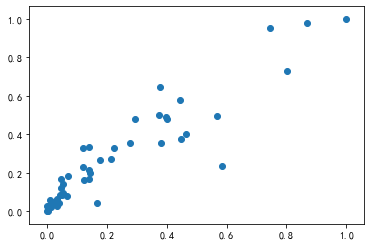

In [33]:
# pick 'charging locations' as an example
cla=df.iloc[:,[3,28]]

cla['Charging Locations'] = cla['Charging Locations'].astype(int)
# Data Normalization
cla=cla.apply(lambda x : (x-np.min(x))/(np.max(x)-np.min(x)))

plt.scatter(cla.iloc[:,0],cla.iloc[:,1])

## Use all features 
Y = avg_sales["Avg_sales"]
lr_data = df.drop(['EV Sales\n2015',
 'EV Sales\n2016',
 'EV Sales\n2017',
 'EV Sales\n2018',
 'EV Sales\n2015 % of Total',
 'EV Sales\n2016 % of Total',
 'EV Sales\n2017 % of Total',
 'EV Sales\n2018 % of Total',
 'Avg % of Total Sales 2015-2018',
 '2017 EV\nMarket Share\nW/in State',
 '2018 EV\nMarket Share\nW/in State', 'EV Stock'],axis=1)
print(lr_data.head())

# Normalize data
min_max_scaler = preprocessing.MinMaxScaler()
lr_data_scaled = min_max_scaler.fit_transform(lr_data)
lr_data_scaled = pd.DataFrame(lr_data_scaled, columns=lr_data.columns)
print("Scaled dataset shape: " + str(lr_data_scaled.shape))
print("Avg sales shape: " + str(Y.shape))

In [22]:
cla.corr()

,EV Sales 2018,Charging Locations
EV Sales\n2018,1.000000,0.965633
Charging Locations,0.965633,1.000000


In [35]:

# lrModel = LinearRegression()
# x = cla.iloc[:,0]
# y = cla.iloc[:,1]
# x = np.array(x).reshape((len(x), 1))
# y = np.array(y).reshape((len(y), 1))
# lrModel.fit(x,y)
# lrModel.score(x,y)
lrModel = LinearRegression()
x = cla.iloc[:,0]
y = cla.iloc[:,1]
x = np.array(x).reshape((len(x), 1))
y = np.array(y).reshape((len(y), 1))
lrModel.fit(x,y)
print("One feature LR score: " + str(lrModel.score(x,y)))

# Use all features
x = lr_data_scaled
y = Y
# x = np.array(x).reshape((len(x), 1))
# y = np.array(y).reshape((len(y), 1))
lrModel.fit(x,y)
print("All feature LR score: " + str(lrModel.score(x,y)))
# def merge(list1, list2): 
#     merged_list = [(list1[i], list2[i]) for i in range(0, len(list1))] 
#     return merged_list
# print("Weights and bias")
# coeffs = merge(lr_data.columns,lrModel.coef_)
# for tup. in coeffs:
#     print()
# print(lrModel.intercept_)


One feature LR score: 0.863983538002592
All feature LR score: 0.9681872779493511


# Random forest 

In [71]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
dx = pd.read_csv('ECE 143.csv')
dx=dx.drop(index=[4, 8])
dx['average_sales'] = dx.iloc[:,0:4].mean(axis=1).to_frame()
dx['average_sales']=dx['average_sales'].astype(int)
# dx=dx.iloc[:,[4,13,14,15,16,17]]
dx=dx.iloc[:,[34,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33]]
dx.columns = ['average_sales', 'Avg/C', 'COMMUTE TIME','PUBLIC TRANSIT USAGE','ROAD QUALITY','BRIDGE QUALITY','Average retail price','Avg gasoline price per gallon',
             'High school graduate or higher','Bachelors degree or higher','Advanced degree','Democratic Representation','Republican Representation',
             'Green Representation','Libertarian/ Independent Representation','Median Household Income','Tax Credit Program','Charging Locations',
             'Charging Outlets','Outlets Per Location','EV Stock','EVs to Charging Outlets']


x, y = dx.iloc[:, 1:].values, dx.iloc[:, 0].values
# x, y = dx.iloc[:, 1:].values, Y.values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
np.nan_to_num(x_train)
np.nan_to_num(x_test)
np.nan_to_num(y_train)
np.nan_to_num(y_test)
feat_labels = dx.columns[1:]

forest = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)
forest.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10000,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [72]:

dx.head()


,average_sales,Avg/C,COMMUTE TIME,PUBLIC TRANSIT USAGE,ROAD QUALITY,BRIDGE QUALITY,Average retail price,Avg gasoline price per gallon,High school graduate or higher,Bachelors degree or higher,...,Republican Representation,Green Representation,Libertarian/ Independent Representation,Median Household Income,Tax Credit Program,Charging Locations,Charging Outlets,Outlets Per Location,EV Stock,EVs to Charging Outlets
0,302,17.1,25.0,43.0,13.0,22.0,9.83,2.54,0.853,0.245,...,0.621,0.0044,0.021,56200,0,115,268,2.33,2487,9.28
1,80,-3.0,8.0,20.0,35.0,36.0,20.22,3.38,0.924,0.290,...,0.513,0.0180,0.059,78394,0,16,26,1.62,534,20.54
2,2299,15.7,32.0,21.0,24.0,4.0,10.52,2.93,0.865,0.284,...,0.487,0.0133,0.041,70674,1,454,1223,2.69,18129,14.82
3,133,15.8,10.0,47.0,36.0,17.0,8.22,2.58,0.856,0.220,...,0.606,0.0084,0.026,54539,0,72,196,2.72,1194,6.09
5,2921,7.3,33.0,14.0,32.0,13.0,10.17,2.81,0.911,0.394,...,0.433,0.0138,0.052,72499,1,692,1857,2.68,19738,10.63


importance： [0.04897226 0.04887659 0.04897652 0.0527415  0.0565578  0.04689592
 0.0495685  0.04848422 0.04875726 0.04723154 0.04781173 0.04690075
 0.04778965 0.04576478 0.04519448 0.01322681 0.04662998 0.04659703
 0.05768894 0.05404529 0.05128844]
 1) Outlets Per Location           0.057689
 2) BRIDGE QUALITY                 0.056558
 3) EV Stock                       0.054045
 4) ROAD QUALITY                   0.052742
 5) EVs to Charging Outlets        0.051288
 6) Avg gasoline price per gallon  0.049569
 7) PUBLIC TRANSIT USAGE           0.048977
 8) Avg/C                          0.048972
 9) COMMUTE TIME                   0.048877
10) Bachelors degree or higher     0.048757
11) High school graduate or higher 0.048484
12) Democratic Representation      0.047812
13) Green Representation           0.047790
14) Advanced degree                0.047232
15) Republican Representation      0.046901
16) Average retail price           0.046896
17) Charging Locations             0.046630
18) 

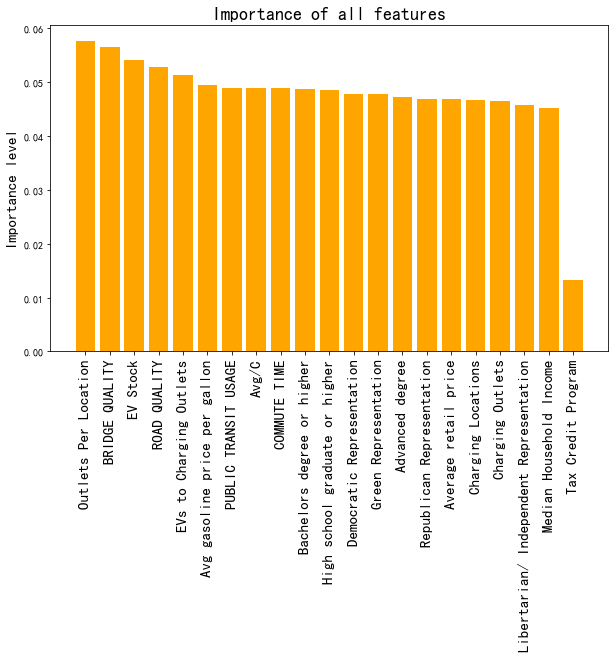

In [73]:
importances = forest.feature_importances_
print("importance：", importances)

x_columns = dx.columns[1:]
indices = np.argsort(importances)[::-1]
x_columns_indices = []
for f in range(x_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, feat_labels[indices[f]], importances[indices[f]]))
    x_columns_indices.append(feat_labels[indices[f]])
plt.figure(figsize=(10, 6))
plt.title("Importance of all features", fontsize=18)
plt.ylabel("Importance level", fontsize=15, rotation=90)
plt.rcParams['font.sans-serif'] = ["SimHei"]
plt.rcParams['axes.unicode_minus'] = False
for i in range(x_columns.shape[0]):
    plt.bar(i, importances[indices[i]], color='orange', align='center')
    plt.xticks(np.arange(x_columns.shape[0]), x_columns_indices, rotation=90, fontsize=15)
plt.show()